In [1]:
import seaborn as sns
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid')
import seaborn


df = pd.read_csv('../data/gedichtenGGD_STCN_Steur.csv', sep=';', index_col=0)
print(df.shape)

(4022, 30)


In [2]:
df.columns

Index(['Database', 'Jaar', 'Bruidegom', 'Bruid', 'Bruidspaar', 'Drukker',
       'Plaats_druk', 'Plaats_huwelijk', 'Auteur1', 'Auteur2', 'Auteur3',
       'Auteur4', 'Auteur5', 'Auteur6', 'Auteur7', 'Auteur8', 'Auteur9',
       'Auteur10', 'Auteur11', 'Auteur12', 'Auteur13', 'Auteur14', 'Auteur15',
       'Auteur16', 'Auteur17', 'Auteur18', 'Auteur19', 'Auteur20', 'Auteur21',
       'Auteur22'],
      dtype='object')

In [3]:
df1 = df.groupby('Drukker')['Drukker'].count().sort_values(ascending=False)

In [4]:
df1.to_csv('Drukkers.csv', sep='\t')

In [5]:
df2 = df.groupby('Plaats_druk')['Plaats_druk'].count().sort_values(ascending=False)

In [6]:
df2.to_csv('Drukplaatsen.csv', sep='\t')

In [7]:
for column in df:
    df[column] = df[column].str.strip()

In [8]:
df['Alleauteurs'] = df[df.columns[8:30]].apply(
    lambda x: ', '.join(x.dropna().astype(str)),
    axis=1)

In [9]:
df.head()

,Database,Jaar,Bruidegom,Bruid,Bruidspaar,Drukker,Plaats_druk,Plaats_huwelijk,Auteur1,Auteur2,...,Auteur14,Auteur15,Auteur16,Auteur17,Auteur18,Auteur19,Auteur20,Auteur21,Auteur22,Alleauteurs
0,,,,,,,,,,,,,,,,,,,,,
7,KB,1710,Pieter Gys (1678-1759),Maria van den Bergh,Pieter Gys (1678-1759) & Maria van den Bergh,NaN,NaN,Amsterdam,Govard Bidloo,Hendrik Snakenburg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Govard Bidloo, Hendrik Snakenburg"
24,KB,1725,Lucas Bardon,Anna Groenewoud,Lucas Bardon & Anna Groenewoud,NaN,NaN,Amsterdam,Pieter Langendyk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pieter Langendyk
25,KB,1720,Cornelis Izaaksz van den Bogaerd,Christina Willink,Cornelis Izaaksz van den Bogaerd & Christina W...,NaN,NaN,Amsterdam,A. Izaaksz van den Bogaerd,Claas Bruin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A. Izaaksz van den Bogaerd, Claas Bruin, Piete..."
32,KB,1721,Abraham van Limburg,Anna Giffenig,Abraham van Limburg & Anna Giffenig,NaN,NaN,Leiden,J. van Tol,Hendrik Fouree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"J. van Tol, Hendrik Fouree, David Giffenig, Jo..."
34,KB,1728,Gerrit Onstenk,Maria van den Ende,Gerrit Onstenk & Maria van den Ende,NaN,NaN,Amsterdam,Willem Onstenk,Magdalena Mansveld,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Willem Onstenk, Magdalena Mansveld, Enoch Krook"


In [10]:
df3 = df['Alleauteurs'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

In [11]:
df3.to_csv('Alleauteurs.csv', sep='\t')

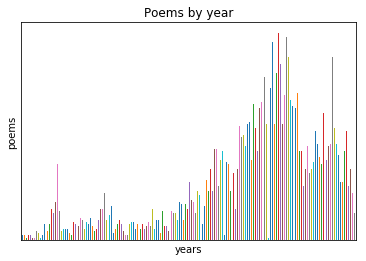

In [12]:
fig1 = df.groupby('Jaar').count()['Bruidspaar'].plot(kind='bar', rot=90)
plt.title('Poems by year')
plt.xlabel('years')
plt.ylabel('poems')
fig1.axes.get_xaxis().set_ticks([])
fig1.axes.get_yaxis().set_ticks([])
plt.savefig('poemsbyyear.png', dp1=600)

In [13]:
df.groupby('Jaar')['Jaar'].count()

Jaar
1600     2
1601     2
1602     1
1603     2
1604     2
1605     1
1606     1
1608     4
1609     3
1610     1
1611     2
1612     7
1613     4
1614     7
1615    14
1616    12
1617    17
1618    34
1619    13
1620     4
1621     5
1622     5
1623     5
1624     3
1626     2
1627     8
1628     7
1629     6
1630    10
1631     9
        ..
1732    59
1733    66
1734    40
1735    40
1736    24
1737    32
1738    42
1739    30
1740    32
1741    35
1742    49
1743    43
1744    37
1745    34
1746    57
1747    36
1748    42
1749    43
1750    82
1751    50
1752    43
1753    38
1754    26
1755    26
1756    40
1757    49
1758    24
1759    32
1760    21
17XX    12
Name: Jaar, Length: 162, dtype: int64

In [14]:
df.to_csv('gedichtenGGD_STCN_Steur_stripped.csv', sep=';')